In [1]:
import importlib
import tabulate
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt




In [2]:
import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

# uncomment once you paste your mypytable.py into mysklearn package
import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable

# uncomment once you paste your myclassifiers.py into mysklearn package
import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MyDummyClassifier, MyNaiveBayesClassifier, MyDecisionTreeClassifier

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

from mysklearn.myutils import detect_and_remove_outliers



In [3]:
table = MyPyTable()
df = table.load_from_file("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.pretty_print()

customerID    gender      SeniorCitizen  Partner    Dependents      tenure  PhoneService    MultipleLines     InternetService    OnlineSecurity       OnlineBackup         DeviceProtection     TechSupport          StreamingTV          StreamingMovies      Contract        PaperlessBilling    PaymentMethod                MonthlyCharges  TotalCharges    Churn
------------  --------  ---------------  ---------  ------------  --------  --------------  ----------------  -----------------  -------------------  -------------------  -------------------  -------------------  -------------------  -------------------  --------------  ------------------  -------------------------  ----------------  --------------  -------
7590-VHVEG    Female                  0  Yes        No                   1  No              No phone service  DSL                No                   Yes                  No                   No                   No                   No                   Month-to-month  Yes        

# Data Cleaning

### Overview of the Dataframe

In [4]:
# Display the number of rows and columns
print("Number of rows and columns :", df.get_shape())


# Display data types of each column
print("\nData types of each column:")
data_types = df.get_data_types()
for col_name, dtype in data_types.items():
    print(f"{col_name}: {dtype}")



Number of rows and columns : (7043, 21)

Data types of each column:
customerID: str
gender: str
SeniorCitizen: float
Partner: str
Dependents: str
tenure: float
PhoneService: str
MultipleLines: str
InternetService: str
OnlineSecurity: str
OnlineBackup: str
DeviceProtection: str
TechSupport: str
StreamingTV: str
StreamingMovies: str
Contract: str
PaperlessBilling: str
PaymentMethod: str
MonthlyCharges: float
TotalCharges: str
Churn: str


### Checking for Missing Values

In [5]:
# Convert 'TotalCharges' to numeric and count invalid values
try:
    df.convert_to_numeric()
    invalid_values_count = sum(1 for value in df.get_column("TotalCharges") if value == "NA")
    print("\nNumber of non-numeric TotalCharges values:", invalid_values_count)
except ValueError as e:
    print("\nError converting 'TotalCharges' to numeric:", e)

# Remove rows with missing 'TotalCharges' values
df.remove_rows_with_missing_values()
print("\nRemoved rows with missing TotalCharges values.")


Number of non-numeric TotalCharges values: 0

Removed rows with missing TotalCharges values.


### Converting  to numeric 

In [6]:
df = df.convert_column_to_type('TotalCharges', float)
print("\nData types of each column:")
data_types = df.get_data_types()
for col_name, dtype in data_types.items():
    print(f"{col_name}: {dtype}")



Data types of each column:
customerID: str
gender: str
SeniorCitizen: float
Partner: str
Dependents: str
tenure: float
PhoneService: str
MultipleLines: str
InternetService: str
OnlineSecurity: str
OnlineBackup: str
DeviceProtection: str
TechSupport: str
StreamingTV: str
StreamingMovies: str
Contract: str
PaperlessBilling: str
PaymentMethod: str
MonthlyCharges: float
TotalCharges: float
Churn: str


### Normalization of Numerical Columns

In [11]:
# Normalize numerical columns
columns_to_normalize = ['tenure', 'MonthlyCharges', 'TotalCharges']
df.normalize_columns(columns_to_normalize)



### Removing duplicates 

In [13]:
key_columns = ['customerID', 'MonthlyCharges', 'TotalCharges']
duplicate_indexes = df.find_duplicates(key_columns)

print("Indexes of duplicate rows:", duplicate_indexes)

df.drop_rows(duplicate_indexes)

print("\nTable after removing duplicates:")
df.pretty_print()


Indexes of duplicate rows: []

Table after removing duplicates:
customerID    gender      SeniorCitizen  Partner    Dependents       tenure  PhoneService    MultipleLines     InternetService    OnlineSecurity       OnlineBackup         DeviceProtection     TechSupport          StreamingTV          StreamingMovies      Contract        PaperlessBilling    PaymentMethod                MonthlyCharges  TotalCharges            Churn
------------  --------  ---------------  ---------  ------------  ---------  --------------  ----------------  -----------------  -------------------  -------------------  -------------------  -------------------  -------------------  -------------------  --------------  ------------------  -------------------------  ----------------  ----------------------  -------
7590-VHVEG    Female                  0  Yes        No            0.0138889  No              No phone service  DSL                No                   Yes                  No                   No     

## Exploratory Data Analysis (EDA)

### Visualizations for Numerical Columns

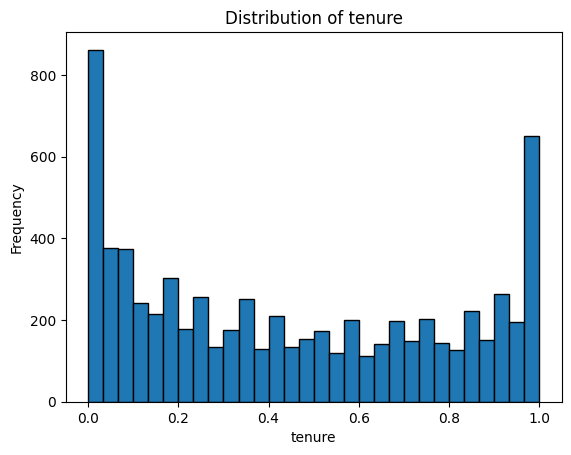

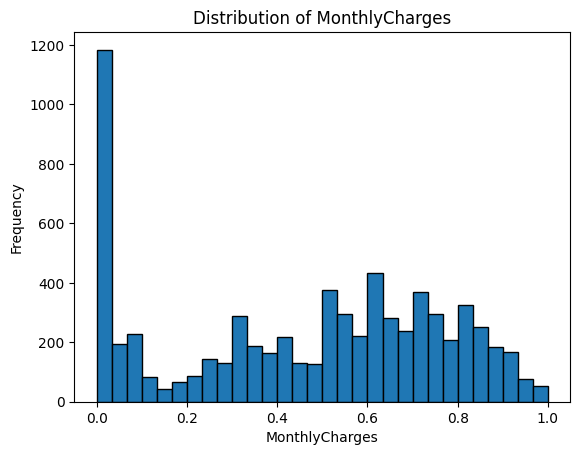

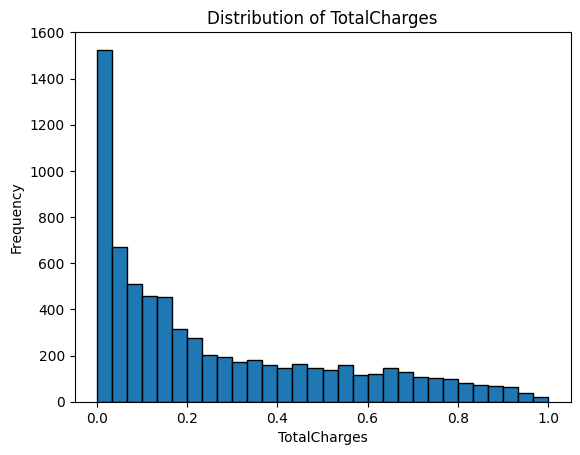

In [8]:
# Columns to visualize
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

for column in numerical_columns:
    plt.figure()

    # Use get_column to retrieve data for the column
    column_data = df.get_column(column, include_missing_values=False)

    # Plot histogram
    plt.hist(column_data, bins=30, edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')
    plt.show()


Analyze relationships between categorical variables (e.g., `Contract`, `Churn`, and `InternetService`).

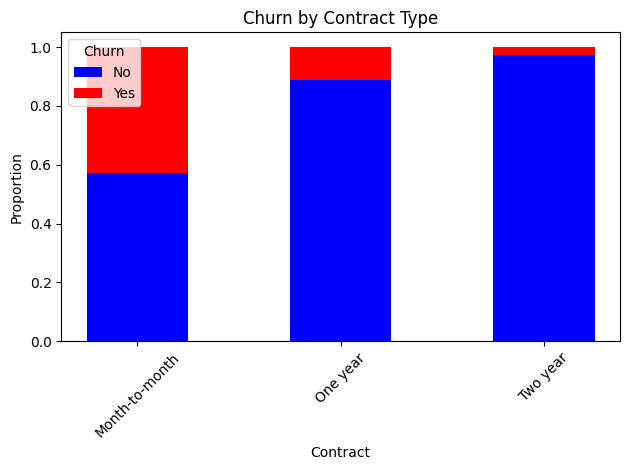

In [9]:
contract_col = table.get_column("Contract")
churn_col = table.get_column("Churn")

# Create a dictionary to count occurrences
contract_churn_counts = {}
for contract, churn in zip(contract_col, churn_col):
    if contract not in contract_churn_counts:
        contract_churn_counts[contract] = {"Yes": 0, "No": 0}
    contract_churn_counts[contract][churn] += 1

# Normalize the counts by contract type
contract_types = list(contract_churn_counts.keys())
yes_counts = [
    contract_churn_counts[contract]["Yes"] /
    (contract_churn_counts[contract]["Yes"] + contract_churn_counts[contract]["No"])
    for contract in contract_types
]
no_counts = [
    contract_churn_counts[contract]["No"] /
    (contract_churn_counts[contract]["Yes"] + contract_churn_counts[contract]["No"])
    for contract in contract_types
]

# Plot the stacked bar chart
bar_width = 0.5
x_positions = range(len(contract_types))

plt.bar(x_positions, no_counts, bar_width, label="No", color="blue")
plt.bar(x_positions, yes_counts, bar_width, bottom=no_counts, label="Yes", color="red")

plt.title("Churn by Contract Type")
plt.xlabel("Contract")
plt.ylabel("Proportion")
plt.xticks(ticks=x_positions, labels=contract_types, rotation=45)
plt.legend(title="Churn")
plt.tight_layout()
plt.show()


## Overview
The dataset contains 7032 rows and 21 columns, with information about customers, their services, and churn behavior.

### Key Features:
- **Categorical**: `gender`, `SeniorCitizen`, `Contract`, `InternetService`, etc.
- **Numerical**: `tenure`, `MonthlyCharges`, `TotalCharges`.

---

## Preprocessing
1. **Missing Values**: Removed 0 rows 
2. **Normalization**: Scaled `tenure`, `MonthlyCharges`, and `TotalCharges` using Min-Max Scaling.
3. **Outliers**: No significant outliers detected after IQR analysis.

---

## Insights
1. **Contract Type**:
   - Customers with "Month-to-Month" contracts have the highest churn rate.
   - Long-term contracts (`One year`, `Two year`) show significantly lower churn.

2. **Numerical Trends**:
   - Customers with shorter tenures are more likely to churn.
   - `MonthlyCharges` has a weak positive correlation with churn.

3. **Service Impact**:
   - "Fiber Optic" users churn more frequently than "DSL" or "No Internet" users.


## Numerical Feature Distributions
1. **Tenure**:
   - The distribution of `tenure` is bimodal, with a high concentration at the beginning (short-tenured customers) and at the maximum value (long-tenured customers).
   - This suggests that customers are either new or have been loyal for a long time.

2. **Monthly Charges**:
   - The `MonthlyCharges` distribution is right-skewed, indicating most customers pay lower monthly charges.
   - However, there is a significant spread, which might correlate with churn behavior.

3. **Total Charges**:
   - The distribution of `TotalCharges` is also skewed to the right, with most customers having lower total charges.
   - This reflects that many customers are either new or have minimal service usage.

